# Esercizio 09.1

In questa esercitazione ho scritto un algoritmo genetico che mi permettesse di ottimizzare il percorso fra un set di punti nel piano al fine di minimizzare la distanza totale (problema del commesso viaggiatore).
Lo sviluppo dei questo codice è risultato particolarmente oneroso, e per evitare di incorrere in bachi ho effettuato una programmazione particolarmente accorta sviluppando a piccoli blocchi (ho costruito una funzione di check, poi ho implementato  e testato una funzione per generare i cammini iniziali, una per effettuare la selezione, poi ho scritto le funzioni per le mutazioni le mutazioni, quindi il crossover...) testando ogni volta il programma su un set di 8 "città" di cui ho scelto accuratamente le posizioni nel piano al fine di avere una soluzione del problema particolarmente semplice. Infine ho soddisfatto la richiesta dell'esercizio, provando il mio codice con l'estrazione delle posizioni di 32 città randomicamente su una circonferenza e all'interno di un quadrato. Presento una breve descrizione del codice per facilitarne l'eventuale lettura, e colgo l'occasione per spiegare anche le riflessioni che ho fatto nello svilupparlo:
il cuore del codice sono le due classi "geneticAlgorithm" e "cities". "geneticAlgorithm" presenta un inizializzatore e una funzione "initializePop" che inizializza la popolazione di percorsi facendo uso di un generatore di numeri random. Questa funzione utilizza l'algoritmo di ricerca binaria che ho scritto fin dalla prima lezione e che più volte mi è tornato utile. In questa classe c'è anche una funzione che effettua la selezione, "selection". La selezione viene eseguita odinando i cammini in base alla loro distanza complessiva, e selezionando i cammini agli indici $j=int(N\times r^p)$ dove $r$ è un numero random $r\in[0,1)$ e ho scelto, sulla base delle mie prove, $p=1.4$. Tale scelta è stata fatta in virtù della necessità di selezionare anche alcuni percorsi leggermente sfavorevoli per garantire una ricerca più "ergodica" all'algoritmo (se selezionassi con un $p$ maggiore prenderei solo i cammini migliori della generazione e tenderei a non esplorare possibiltà diverse). Sempre nella classe "geneticAlgorithm" ho implementato tre funzioni che eseguono tre diverse mutazioni. La prima è il semplice scambio fra due città del percorso, estratte a caso. Questo scambio avviene durante una generazione con probabilità $p_{pr}=0.08$. Il secondo tipo di mutazione è l'inversione di una sequenza di città. Per implementare questa mutazione mi sono basato sul fatto che essa dovrebbe avere una probabilità di avvenire inversamente proporzionale alla lunghezza della sequenza $m$. Quest'ultima viene estratta casualmente e viene calcolata la probabilità di far avvenire la mutazione viene calcolata come $p_{inv} = \frac{0.14}{m}$. Si noti che nel caso $m=2$, $p_{inv} \sim p_{pr}$. La terza mutazione che ho implementato è lo scambio fra due sequenze di città estratte casualmente nel percorso. Anche in questo caso ho scelto una probabilità $p_{exc} = \frac{0.14}{m}$ inversamente proporzionale alla dimensione delle sequenze. Ho implementato il crossover come consigliato sul jupiter notebook della consegna: estraggo un punto delle due sequenze ed elimino una delle due parti che ho separato. Ricostriusco la parte mancante di una delle due sequenze sulla base dell'ordine nell'altra. La classe "cities" ha la funzione di occuparsi di tutto ciò che riguarda le città: estrae casualmente le città su una circonferenza o all'interno di un quadrato, e viene utilizzata estesamente da "geneticAlgorithm" laddove ai fini dell'ordinamento e della selezione sia necessario calcolare la distanza complessiva di un percorso/sequenza (si veda la funzione "distanceTraveled"). Come misura della distanza ho scelto $L^{(2)}$ per ridurre le operazioni da fare.

Di seguito presento i risultati ottenuti nel caso di città distribuite su una circonferenza. I punti rossi rappresentano le città, i segmenti che le uniscono formano il percorso ottimizzato. L'ultimo tratto, che porta l'ultima città alla prima, non è stato tracciato.

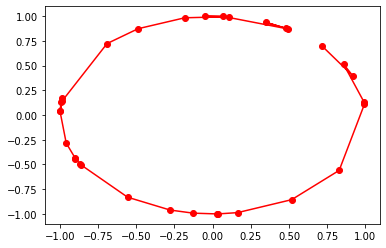

In [16]:
import matplotlib.pyplot as plt
import numpy as np

filename = "esercizio09.1/circ.txt"

x = np.loadtxt(filename, usecols = 0)
y = np.loadtxt(filename, usecols = 1)

filename_seq = "esercizio09.1/circ_path.txt"

seq = np.loadtxt(filename_seq)

x_ = np.zeros(len(x))
y_ = np.zeros(len(y))

for i in range(np.size(x)):
    x_[i] = x[int(seq[i])-1]
    y_[i] = y[int(seq[i])-1]
    
plt.plot(x_,y_, 'r-o')

Come si vede, sono presenti ancora alcuni incroci nel perscorso, ma l'algoritmo è riuscito a ricostruire quasi esattamente il percorso migliore. E' possibile che riducendo la probabilità delle mutazioni e aumentando il numero di generazioni si converga al percorso migliore.

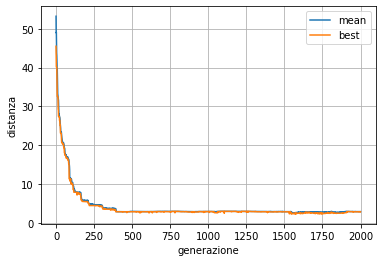

In [2]:
import matplotlib.pyplot as plt
import numpy as np

filename = "esercizio09.1/circ_meanL.txt"

gen = np.loadtxt(filename, usecols = 0)
meanl = np.loadtxt(filename, usecols = 1)
bestl = np.loadtxt(filename, usecols = 2)
    
plt.plot(gen,meanl, label = 'mean')
plt.plot(gen,bestl, label = 'best')
plt.xlabel('generazione')
plt.ylabel('distanza')
plt.grid(True)
plt.legend()
plt.legend()

Il grafico soprastante rappresenta la distanza media calcolata sulla metà migliore della popolazione e la distanza del percorso migliore, in funzione del numero di generazioni. Si nota come l'algoritmo si stabilizzi al minimo dopo circa 400 generazioni.

Di seguito riporto i risultati ottenuti nel caso delle città poste randomicamente all'interno di  un quadrato.

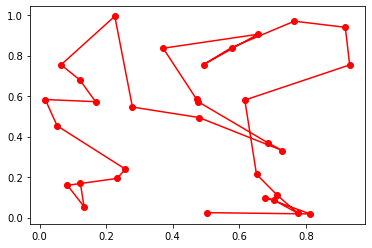

In [15]:
import matplotlib.pyplot as plt
import numpy as np

filename = "esercizio09.1/square.txt"

x = np.loadtxt(filename, usecols = 0)
y = np.loadtxt(filename, usecols = 1)

filename_seq = "esercizio09.1/square_path.txt"

seq = np.loadtxt(filename_seq)

x_ = np.zeros(len(x))
y_ = np.zeros(len(y))

for i in range(np.size(x)):
    x_[i] = x[int(seq[i])-1]
    y_[i] = y[int(seq[i])-1]
    
plt.plot(x_,y_, 'r-o')

Si può notare come siano ancora presenti degli incroci e quindi il percorso milgiore non sia stato trovato. Il numero di incroci è comunque sicuramente minore che nel caso di un percorso tracciato casulamente: l'algoritmo ha comunque eseguito un'ottimizzazione del percorso.

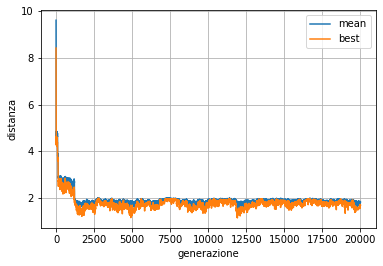

In [3]:
import matplotlib.pyplot as plt
import numpy as np

filename = "esercizio09.1/square_meanL.txt"

gen = np.loadtxt(filename, usecols = 0)
meanl = np.loadtxt(filename, usecols = 1)
bestl = np.loadtxt(filename, usecols = 2)
    
plt.plot(gen,meanl, label = 'mean')
plt.plot(gen,bestl, label = 'best')
plt.xlabel('generazione')
plt.ylabel('distanza')
plt.grid(True)
plt.legend()
plt.legend()

Nel grafico delle distanze notiamo che l'algoritmo si stabilizza approssimativamente attorno alla generazione 1000. Si nota anche la presenza di molto più rumore rispetto al caso precedente e una maggiore discrepanza fra la distanza media e quella minima: questi sono sintomi del fatto che probabilmente si ha una popolazione molto più eterogenea, in cui le mutazioni producono spesso percorsi con distanze simili ma fra loro molto diversi.